In [ ]:
# Basic imports
import os
import sys
import time
import timeit
import random
import pickle
import re
from itertools import product
import warnings

# System path modification
sys.path.insert(0, '..')

# Data handling
import pandas as pd
import numpy as np

# Machine learning imports
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer, TransformedTargetRegressor
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, KNNImputer, IterativeImputer, MissingIndicator
from sklearn.model_selection import (
    train_test_split, KFold, StratifiedKFold, GroupKFold, StratifiedGroupKFold, LeaveOneOut, cross_validate, cross_val_score
)
from sklearn.linear_model import (
    LinearRegression, Lasso, LassoCV, MultiTaskLasso, MultiTaskLassoCV,
    ElasticNet, ElasticNetCV, MultiTaskElasticNet, MultiTaskElasticNetCV
)
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score

from sklearn.cross_decomposition import PLSRegression
from sklearn.inspection import permutation_importance


# Statistic imports 
from scipy.stats import ks_2samp
from scipy.special import kl_div
from scipy.cluster.hierarchy import linkage, leaves_list
from scipy.spatial.distance import pdist, squareform

# Specialized imputation and visualization packages
import miceforest as mf
import missingno as msno
#from missforest import MissForest
#import magic
from src.gain import *

# Custom modules
from src.train import *
from src.functions import *
from src.plots import *
from src.dataset import *
from src.multixgboost import *

# Visualizatiokn 
import matplotlib.pyplot as plt
import seaborn as sns

# Deep learning and machine learning specific 
import torch
from pytorch_tabnet.tab_model import TabNetRegressor
import xgboost as xgb
import shap

# Ignore warnings
warnings.filterwarnings("ignore")

# Print CUDA availability for PyTorch
print(torch.cuda.is_available())
print(torch.cuda.device_count())

ModuleNotFoundError: No module named 'gain_utils'

In [1]:
from pytorch_tabnet.tab_model import TabNetRegressor
TabNetRegressor()

/home/chris/miniforge3/envs/optimus/lib/python3.10/site-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


TabNetRegressor(n_d=8, n_a=8, n_steps=3, gamma=1.3, cat_idxs=[], cat_dims=[], cat_emb_dim=[], n_independent=2, n_shared=2, epsilon=1e-15, momentum=0.02, lambda_sparse=0.001, seed=0, clip_value=1, verbose=1, optimizer_fn=<class 'torch.optim.adam.Adam'>, optimizer_params={'lr': 0.02}, scheduler_fn=None, scheduler_params={}, mask_type='sparsemax', input_dim=None, output_dim=None, device_name='auto', n_shared_decoder=1, n_indep_decoder=1, grouped_features=[])

In [2]:
results_pickle_folder = "./6.1.2_missingnesss_aware_selection_pickle"

In [3]:
df_X_original = pd.read_pickle('../pickle/df_X_original.pickle')
df_X = pd.read_pickle('../pickle/df_X_filtered.pickle')
df_y =  pd.read_pickle('../pickle/df_y_original.pickle')
df_all = pd.read_pickle('../pickle/df_all_original.pickle')
select = pd.read_pickle('../pickle/select_features.pickle')

miss_mask = pd.read_pickle('../pickle/filter_miss_mask.pickle')
miss_mask = miss_mask.tolist()


NameError: name 'pd' is not defined

In [ ]:
df_X = df_X_original.drop(columns=[*select["MRIvol"], *select["PET"]])
df_X = df_X[miss_mask]
df_all = df_all[miss_mask]
df_y = df_y[miss_mask]

In [ ]:
full_palette_tab = {"pink": "#d95990", "yellow": "#dbc205", "blue": "#51c1e6", "purple":"#a6609e", "red":"#df3d21", "grey":"#6e6e6e"}
gender_palette_tab = {
    "0": full_palette_tab["yellow"], 
    "1": full_palette_tab["pink"]
}
dx_palette_tab = {
    "CN": full_palette_tab["blue"],
    "MCI": full_palette_tab["yellow"],
    "AD": full_palette_tab["red"], 
}

In [ ]:
gender_palette = gender_palette_tab
dx_palette = dx_palette_tab
full_palette = full_palette_tab
sns.color_palette(list(full_palette.values()))

[(0.8509803921568627, 0.34901960784313724, 0.5647058823529412),
 (0.8588235294117647, 0.7607843137254902, 0.0196078431372549),
 (0.3176470588235294, 0.7568627450980392, 0.9019607843137255),
 (0.6509803921568628, 0.3764705882352941, 0.6196078431372549),
 (0.8745098039215686, 0.23921568627450981, 0.12941176470588237),
 (0.43137254901960786, 0.43137254901960786, 0.43137254901960786)]

In [ ]:
full_palette_graph = {"orange": "#de7859", "yellow": "#ebed72", "blue": "#3f4861","cyan": "#7ad8eb", "purple":"#b1a7cf", "green":"#75bfaa"}

gender_palette_tab = {
    "0": full_palette_graph["green"], 
    "1": full_palette_graph["purple"]
}
dx_palette_tab = {
    "CN": full_palette_graph["cyan"],
    "MCI": full_palette_graph["yellow"],
    "AD": full_palette_graph["orange"], 
}
print()

gender_palette = gender_palette_tab
dx_palette = dx_palette_tab
full_palette = full_palette_tab

sns.color_palette(list(full_palette_graph.values()))

[(0.8705882352941177, 0.47058823529411764, 0.34901960784313724),
 (0.9215686274509803, 0.9294117647058824, 0.4470588235294118),
 (0.24705882352941178, 0.2823529411764706, 0.3803921568627451),
 (0.47843137254901963, 0.8470588235294118, 0.9215686274509803),
 (0.6941176470588235, 0.6549019607843137, 0.8117647058823529),
 (0.4588235294117647, 0.7490196078431373, 0.6666666666666666)]

In [ ]:
full_palette_graph = {"orange": "#a93226", "yellow": "#FF9933", "blue": sns.color_palette("Set1")[1], "cyan": sns.color_palette("Set1")[5], "purple":sns.color_palette("Set1")[3], "green":sns.color_palette("Set1")[2]}
gender_palette_tab = {
    "0": full_palette_graph["green"], 
    "1": full_palette_graph["purple"]
}
dx_palette_tab = {
    "CN": full_palette_graph["blue"],
    "MCI": full_palette_graph["yellow"],
    "AD": full_palette_graph["orange"], 
}

gender_palette = gender_palette_tab
dx_palette = dx_palette_tab
full_palette = full_palette_tab

sns.color_palette(list(full_palette_graph.values()))

[(0.6627450980392157, 0.19607843137254902, 0.14901960784313725),
 (1.0, 0.6, 0.2),
 (0.21568627450980393, 0.49411764705882355, 0.7215686274509804),
 (1.0, 1.0, 0.2),
 (0.596078431372549, 0.3058823529411765, 0.6392156862745098),
 (0.30196078431372547, 0.6862745098039216, 0.2901960784313726)]

In [ ]:
full_palette_graph = {"orange": "#ff4b41", "yellow": "#ffaa41", "blue": "#75d8ff", 
                      "cyan": "#d7d341", "purple":"#e59edd", 
                      "green":"#70d941"}
gender_palette_tab = {
    "0": full_palette_graph["green"], 
    "1": full_palette_graph["purple"]
}
dx_palette_tab = {
    "CN": "#75d8ff",
    "MCI": "#ffcc92",
    "AD": "#ff4b41", 
}

gender_palette = gender_palette_tab
dx_palette = dx_palette_tab
full_palette = full_palette_graph
sns.color_palette(list(full_palette.values()))

[(1.0, 0.29411764705882354, 0.2549019607843137),
 (1.0, 0.6666666666666666, 0.2549019607843137),
 (0.4588235294117647, 0.8470588235294118, 1.0),
 (0.8431372549019608, 0.8274509803921568, 0.2549019607843137),
 (0.8980392156862745, 0.6196078431372549, 0.8666666666666667),
 (0.4392156862745098, 0.8509803921568627, 0.2549019607843137)]

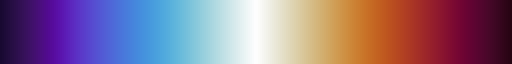

In [ ]:
from cmap import Colormap

cm_div = Colormap('cmasher:fusion_r').to_matplotlib()
cm_div


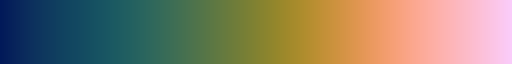

In [ ]:
cm_seq = Colormap('batlow').to_matplotlib()
cm_seq

##### Extra plot for transcriptomics

In [ ]:
df_X.columns.has_duplicates

False

In [ ]:
df_all_counts = pd.read_csv("../../../dataset/ADNI/gene_expression_microarray/filtered_counts.csv", index_col=0)
df_samples = pd.read_csv("../../../dataset/ADNI/gene_expression_microarray/filtered_samples.csv", index_col=0)
df_genes = pd.read_csv("../../../dataset/ADNI/gene_expression_microarray/filtered_genes.csv", index_col=0)
df_dge = pd.read_csv("../../../dataset/ADNI/gene_expression_microarray/dge_gene_selection.csv", index_col=0)
df_dge_median = pd.read_csv("../../../dataset/ADNI/gene_expression_microarray/dge_gene_selection_median_filter.csv", index_col=0)
df_samr = pd.read_csv("../../../dataset/ADNI/gene_expression_microarray/samr_gene_up.csv", index_col=0)

In [ ]:
df_X_rna = pd.concat([df_X[list(set(select["RNA"]))].reset_index(drop=True), 
                      df_all[["RID", "DX"]].reset_index(drop=True)], axis=1).dropna().drop_duplicates().sort_values("RID").drop_duplicates(subset="RID")

custom_dict = {'CN': 0, 'MCI': 1, 'AD': 2}

df_X_rna = df_X_rna.sort_values("DX", key=lambda x: x.map(custom_dict))
print(df_X_rna.columns.has_duplicates or df_X_rna.RID.duplicated().sum())

0


CN
MCI
AD


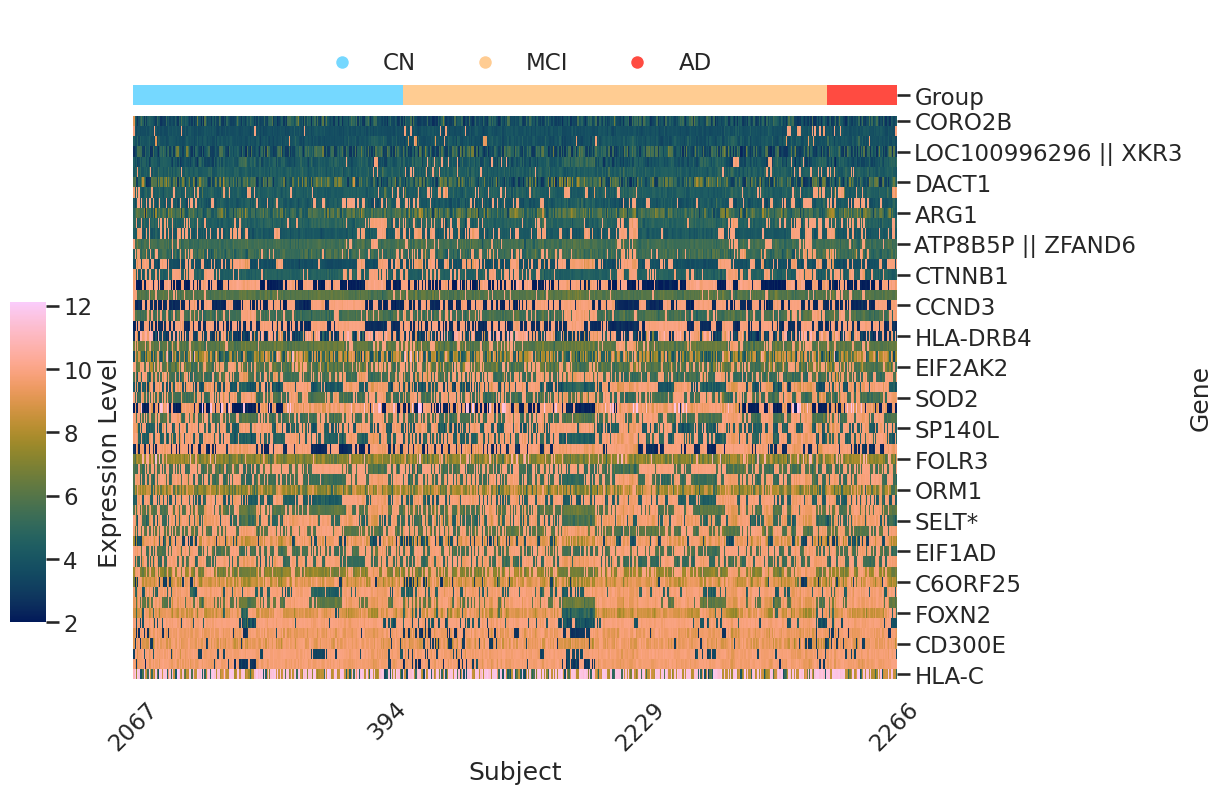

In [ ]:
ordered_subjects= []

sns.set(style="whitegrid", context="talk")

for dx in ["CN", "MCI", "AD"]: 
    print(dx)
    group_data = df_X_rna[df_X_rna.DX == dx]

    distance_matrix = pdist(group_data.drop(columns=["RID", "DX"]), metric="euclidean")  
    linkage_matrix = linkage(distance_matrix, method="centroid")  

    # Get the order of columns based on hierarchical clustering
    clustered_order = [group_data.index[i] for i in leaves_list(linkage_matrix)]
    
    # Add the clustered order to the list of ordered columns
    ordered_subjects.extend(clustered_order)

# Sort transcriptomics Subjects
df_X_rna = df_X_rna.reindex(ordered_subjects)

# Sort transcriptmics Genes
ordered_genes = df_dge.sort_values("logCPM").drop_duplicates("Symbol", keep="first").Symbol.tolist()
# ordered_genes = df_X_rna.drop(columns=["RID", "DX"]).mean().sort_values().index.tolist()

df_X_rna = df_X_rna.reindex(["RID", "DX"]+ordered_genes, axis=1)

dx_colors = df_X_rna["DX"].rename("Group").map(dx_palette_tab)
df_X_rna_sorted = df_X_rna.drop(columns=["RID", "DX"]).T.dropna()

g = sns.clustermap(df_X_rna_sorted, figsize=(12,8), dendrogram_ratio=0.1, 
               col_colors=dx_colors, cmap=cm_seq, method="centroid", col_cluster=False, row_cluster=False,
               cbar_kws={"label": "Expression Level"},
               cbar_pos=(0, .2, .03, .4)) #, xticklabels=False)

# Reduce the number of ticks in the x-axis by setting new ticks manually
num_ticks = 3  # Choose how many ticks you want
tick_positions = range(0, len(df_X_rna_sorted.columns), max(1, len(df_X_rna_sorted.columns) // num_ticks))

# Ensure the number of ticks does not exceed the available columns
tick_positions = tick_positions[:len(g.ax_heatmap.get_xticklabels())]  # Adjust the number of positions if necessary

# Apply the new x-ticks and their labels
tick_labels = g.ax_heatmap.get_xticklabels()
step = len(tick_labels) // len(tick_positions) if len(tick_positions) > 0 else 1
g.ax_heatmap.set_xticks(tick_positions)
g.ax_heatmap.set_xticklabels(tick_labels[:len(tick_positions)], rotation=45)  # Make sure labels match the tick positions

# Add x and y axis labels
g.ax_heatmap.set_xlabel("Subject", fontsize=18)
g.ax_heatmap.set_ylabel("Gene", fontsize=18)

# Add a custom legend for group_colors at the top
handles, labels = [], []
for label, color in dx_palette_tab.items():
    handles.append(plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10))
    labels.append(label)

# Position the legend at the top, horizontally
g.ax_heatmap.legend(handles, labels,loc="upper center", bbox_to_anchor=(0.5, 1.15), ncol=3, frameon=False)

plt.savefig("../figures/heatmap_final_trasncriptomics_mean_sorted.png", format="png", bbox_inches='tight',  )

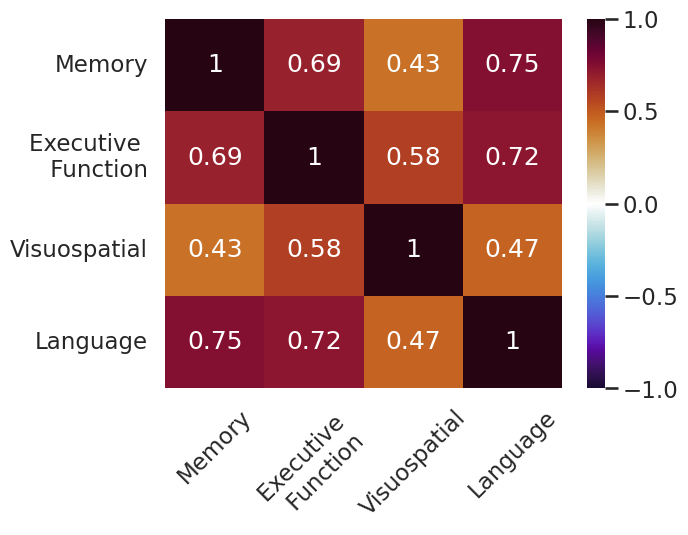

In [ ]:
# Mapping the current column names to more readable names
label_map = {
    "ADNI_MEM": "Memory",
    "ADNI_EF": "Executive \n Function",
    "ADNI_VS": "Visuospatial",
    "ADNI_LAN": "Language"
}

# Rename the columns in df_y using the label_map
df_y_renamed = df_y.rename(columns=label_map)

# Plotting the heatmap
sns.set(style="whitegrid", context="talk")
sns.heatmap(df_y_renamed.corr(), cmap=cm_div, annot=True, vmax=1, vmin=-1, cbar_kws=dict(ticks=[1, .5, 0, -0.5, -1]))
plt.xticks(rotation=45)
# Save the figure
plt.savefig("../figures/cognitive_target_correlation.png", bbox_inches='tight',  format="png")

# Scikit-learn Pipeline

In [ ]:
df_X.describe()

,ARG1,ATP8B5P || ZFAND6,C17ORF103,C6ORF25,CLU,CORO2B,CTNNB1,DACT1,ELOVL5,FOLR3,...,LH_Default_pCunPCC_1_Cortical,RH_Default_PFCdPFCm_6_Cortical,LH_Default_pCunPCC_2_Cortical,RH_Default_PFCdPFCm_7_Cortical,LH_Default_pCunPCC_3_Cortical,RH_Default_pCunPCC_1_Cortical,LH_Default_pCunPCC_4_Cortical,RH_Default_pCunPCC_2_Cortical,LH_Default_PHC_1_Cortical,RH_Default_pCunPCC_3_Cortical
count,1576.000000,1576.000000,1576.000000,1576.000000,1576.000000,1576.000000,1576.000000,1576.000000,1576.000000,1576.000000,...,2894.000000,2894.000000,2894.000000,2894.000000,2894.000000,2894.000000,2894.000000,2894.000000,2894.000000,2894.000000
mean,5.465829,5.876769,5.176332,8.388430,8.110685,3.914099,6.107469,4.846871,7.125889,7.625505,...,2.426352,2.294729,2.442075,2.347467,2.617300,2.465994,2.221523,2.437534,2.208972,2.219478
std,0.980437,1.262680,1.877623,1.678091,2.309744,0.880751,2.400343,1.314009,2.770450,1.215831,...,0.210257,0.175983,0.200666,0.202041,0.196827,0.206006,0.198146,0.185326,0.240592,0.197507
min,2.628000,3.910000,3.702000,2.507000,2.638000,2.512000,3.824000,2.530000,2.895000,4.960000,...,0.092409,1.036019,0.662630,1.158819,0.861630,0.933154,0.806433,0.920390,0.072695,1.382339
25%,4.740000,5.311000,4.260000,8.260000,8.258000,3.177000,4.487000,3.774000,4.156000,6.897000,...,2.293128,2.193473,2.323516,2.231359,2.492637,2.338554,2.107488,2.329423,2.066025,2.104617
50%,5.480000,5.528500,4.437000,8.843500,9.192500,3.811000,4.708000,4.818000,9.193000,7.381000,...,2.430732,2.306192,2.457016,2.356849,2.617977,2.477207,2.235622,2.455362,2.222308,2.230929
75%,6.127500,5.832000,4.799000,9.302000,9.566000,4.523000,9.684000,5.855000,9.704000,7.920000,...,2.571078,2.411552,2.576584,2.478044,2.743150,2.601740,2.350323,2.561225,2.370080,2.355452
max,8.663000,9.994000,9.998000,9.987000,9.998000,9.126000,9.999000,8.674000,9.999000,11.240000,...,3.064751,2.946740,3.201875,3.139660,3.379257,3.152664,2.810952,2.938689,3.081316,2.846381


In [ ]:
df_X[["APOE_epsilon2", "APOE_epsilon3", "APOE_epsilon4"]] = df_X[["APOE_epsilon2", "APOE_epsilon3", "APOE_epsilon4"]].astype("category")
df_all[["RID", "VISCODE", "ABETA", "TAU", "PTAU"]].dropna().RID.value_counts()

1190    5
729     5
671     4
1046    4
31      4
       ..
1090    1
1097    1
1109    1
1117    1
5290    1
Name: RID, Length: 327, dtype: int64

In [ ]:
df_all[["RID", "VISCODE", "ABETA", "TAU", "PTAU"]].dropna().VISCODE.value_counts()

m24     176
m12     118
m48      47
bl       32
m36      30
m60      15
m72       8
m84       3
m96       2
m108      1
Name: VISCODE, dtype: int64

## Modify imputers to add to Pipeline 

Miceforest should have both fit and transform classes to be called in a scikit-learn pipeline, however, let's write a quick wrapper who also has the fit transform function. 

# Build scikit-learn pipeline without pipeline since it is not working

In [ ]:
def train_imputer_model(
    df_X_train, df_X_test, df_y_train, df_y_test,
    c_train, c_test,
    ordinal_model, name_ordinal_imputer, 
    continuous_model, name_continuous_imputer, 
    model, name_model, 
    imputer_model=None, name_imputer=None, 
    separate_imputers=True,
    ordinal_features = ['APOE_epsilon2', 'APOE_epsilon3', 'APOE_epsilon4']
): 
    # Define which columns are ordinal and which are continuous
    continuous_features = [col for col in df_X_train.columns if col not in ordinal_features]

    # Check if a general imputer model (like MissForest or MICEForest) is provided
    if imputer_model is not None and name_imputer is not None and not separate_imputers:
        # If `imputer_model` can handle both categorical and continuous data types
        print(f"Using general imputer model: {name_imputer}")

        # Ensure that ordinal columns are marked as categorical
        df_X_train = df_X_train.copy()
        df_X_test = df_X_test.copy()
        
        for col in ordinal_features:
            df_X_train[col] = df_X_train[col].astype("category")
            df_X_test[col] = df_X_test[col].astype("category")

        # Create a pipeline with the general imputer
        pipeline = Pipeline(steps=[
            (name_imputer, imputer_model)
        ])

        # Fit and transform the entire dataset with the general imputer
        pipeline.fit(df_X_train)
        X_train_imputed = pipeline.transform(df_X_train)
        X_test_imputed = pipeline.transform(df_X_test)

        # Convert transformed output back to DataFrame with original column names
        df_X_train_imputed = pd.DataFrame(X_train_imputed, columns=df_X_train.columns)
        df_X_test_imputed = pd.DataFrame(X_test_imputed, columns=df_X_test.columns)

    else:
        # Separate imputers for ordinal and continuous data
        print("Using separate imputers for ordinal and continuous data.")

        df_X_train = df_X_train.copy()
        df_X_test = df_X_test.copy()

        # Continuous Imputation Transformer (Example: SimpleImputer)
        continuous_imputer = Pipeline([
            (name_continuous_imputer, continuous_model),
        ])

        # Ordinal Imputation Transformer (Example: KNN Imputer)
        ordinal_imputer = Pipeline([
            (name_ordinal_imputer, ordinal_model)
        ])

        # Create a ColumnTransformer to apply the appropriate imputer to each type of variable
        preprocessor = ColumnTransformer(
            transformers=[
                ('ordinal', ordinal_imputer, ordinal_features),
                ('continuous', continuous_imputer, continuous_features)
            ],
            remainder='passthrough'
        )

        # Create the pipeline
        pipeline = Pipeline(steps=[
            ('preprocessor', preprocessor)
        ])

         # Separate imputers for ordinal and continuous data

        # Fit and transform, then convert back to DataFrame with original column names

        if df_X_train.isna().any().any():
                
            start = time.time()
            pipeline.fit(df_X_train)
            end = time.time()

            impute_model_time = end - start

            X_train_imputed = pipeline.transform(df_X_train)
            df_X_train_imputed = df_X_train.copy()
            df_X_train_imputed[ordinal_features+continuous_features] = X_train_imputed

        else :
            print("No NaN in train data -> Keep as it is. ")
            df_X_train_imputed = df_X_train
            
            impute_model_time = None

        # Transform the test set
        if df_X_test.isna().any().any():
             
            X_test_imputed = pipeline.transform(df_X_test)
            df_X_test_imputed = df_X_test.copy()
            df_X_test_imputed[ordinal_features+continuous_features] = X_test_imputed
        else : 
            print("No NaN in test data -> Keep as it is. ")
            df_X_test_imputed = df_X_test

    #df_X_train_imputed[ordinal_features] = df_X_train_imputed[ordinal_features].astype("category")
    #df_X_test_imputed[ordinal_features] = df_X_test_imputed[ordinal_features].astype("category")

    # Demographics adjustment for y
    demographic_adjustment_y = DemographicAdjustmentTransformer()
    
    y_train_adjusted = demographic_adjustment_y.fit_transform(df_y_train, c_train)
    y_test_adjusted = demographic_adjustment_y.transform(df_y_test, c_test)

    # Demographics adjustment for X
    demographic_adjustment_X = DemographicAdjustmentTransformer(categorical_columns=ordinal_features)
    X_train_adjusted = demographic_adjustment_X.fit_transform(df_X_train_imputed, c_train)
    X_test_adjusted = demographic_adjustment_X.transform(df_X_test_imputed, c_test)

    # Perform prediction and save variables
    start = time.time()

    if isinstance(model, TabNetRegressor): 
        X_train_adjusted = X_train_adjusted.values
        y_train_adjusted = y_train_adjusted.values

        X_test_adjusted = X_test_adjusted.values
        #y_test_adjusted = y_test_adjusted.values
    
    model.fit(X_train_adjusted, y_train_adjusted)
    end = time.time()

    predict_model_time = end - start

    y_pred_adjusted = model.predict(X_test_adjusted)

    y_pred_adjusted = pd.DataFrame(y_pred_adjusted, columns=y_test_adjusted.columns)

    # Metrics computed in original space
    y_pred = demographic_adjustment_y.inverse_transform(y_pred_adjusted, c_test)

    params = {
        "ordinal_imputer": name_ordinal_imputer, 
        "continuous_imputer": name_continuous_imputer, 
        "model": name_model, "train_shape" : X_train_adjusted.shape, 
        "test_shape": X_test_adjusted.shape
    }
    
    if df_X_test.shape[0] != 1: 

        # Metrics computed in adjusted space
        mse_score_adj, mae_score_ajd, r2_adj, explained_variance_adj, corr_adj = compute_all_metrics(y_test_adjusted.values, y_pred_adjusted)

        results_adj = {
            "mse_score": mse_score_adj, 
            "mae_score":mae_score_ajd, 
            "r2":r2_adj, 
            "explained_variance":explained_variance_adj, 
            "corr":corr_adj, 
        }

        mse_score, mae_score, r2, explained_variance, corr = compute_all_metrics(df_y_test.values, y_pred)

        results_org = {
            "mse_score": mse_score, 
            "mae_score": mae_score, 
            "r2": r2, 
            "explained_variance": explained_variance, 
            "corr": corr, 
        }

    else : 
        print("Saving predictions in dict!")
        results_adj = {
            "y_pred": y_pred_adjusted.values, 
            "y_test": y_test_adjusted.values,
        }

        results_org = {
            "y_pred": y_pred.values, 
            "y_test": df_y_test.values,
        }


    dict_results = {
        "params": params, 
        "imputation_time": impute_model_time,
        "fitting_time": predict_model_time, 
        "results_adj": results_adj, 
        "results_org": results_org
        }

    return dict_results


Now let's list all imputation models and machine learning models that can be used : 

Continuous imputation: 
- Mean imputation
- KNN n=1 or n=5
- MICE
- MICE forest
- Miss forest
- GAIN

Ordinal imputation: 
- KNN n=1
- Missingness imputation -> Replace by -1 to indicate that it is missing
- Most frequent imputation

Predictive models: 
- Linear regression, ElasticNet, Lasso, SVM regression
- DecisionTreeRegressor, RandomForest, XGBoost
- TabNet, TabNet_32, TabNet_64
- PLSRegression_2, PLSRegression_10, PLSRegression_50

Note that scikit-learn has a bunch of models encoded as a multi-task problems for example it exists an ElasticNet who inherently can take multiple targets as input and a MultiTaskElasticNet that does the same. I do guess that the MultiTaskElasticNet has some assumptions about the targets to be able to trrain more quickly. 

Also not that MultiOutputRegressor is a wrapper that can fit one regressor per target.

Note also that mice forest AND missforest might have imputers that deal with categorical data anyways, therefore we might want to use normal iputer and not need to make a composite one. 

Note that according to [scikit-learn](https://scikit-learn.org/1.5/modules/multiclass.html) these models can perform multioutput regression : 

cross_decomposition.CCA

tree.DecisionTreeRegressor

dummy.DummyRegressor

linear_model.ElasticNet

tree.ExtraTreeRegressor

ensemble.ExtraTreesRegressor

gaussian_process.GaussianProcessRegressor

neighbors.KNeighborsRegressor

kernel_ridge.KernelRidge

linear_model.Lars

linear_model.Lasso

linear_model.LassoLars

linear_model.LinearRegression

multioutput.MultiOutputRegressor

linear_model.MultiTaskElasticNet

linear_model.MultiTaskElasticNetCV

linear_model.MultiTaskLasso

linear_model.MultiTaskLassoCV

linear_model.OrthogonalMatchingPursuit

cross_decomposition.PLSCanonical

cross_decomposition.PLSRegression

linear_model.RANSACRegressor

neighbors.RadiusNeighborsRegressor

ensemble.RandomForestRegressor

multioutput.RegressorChain

linear_model.Ridge

linear_model.RidgeCV

compose.TransformedTargetRegressor



In [ ]:
random_state=42
n_imputation_iter = 10

# Define hyperparameters
gain_parameters = {
    'hint_rate': 0.9,
    'alpha': 100,
    'iterations': 1000
}

# Continuous Imputer List (list of tuples with unique strings and corresponding instances)
continuous_imputer_list = [
    ("SimpleImputer_mean", SimpleImputer(strategy="mean")),
    ("KNNImputer", KNNImputer(n_neighbors=1)),
    ("IterativeImputer", IterativeImputer(max_iter=n_imputation_iter, random_state=random_state)),
]

# Ordinal Imputer List (list of tuples with unique strings and corresponding instances)
ordinal_imputer_list = [
    ("SimpleImputer_most_frequent", SimpleImputer(strategy="most_frequent")),
    ("KNNImputer", KNNImputer(n_neighbors=1)),
    ("SimpleImputer_constant", SimpleImputer(strategy="constant", fill_value=-1))
]

# Predictive Models List (list of tuples with unique strings and corresponding instances)
predictive_models_list = [
    ("LinearRegression", LinearRegression()),
]

# Generate all combinations
combinations = list(product(continuous_imputer_list, ordinal_imputer_list, predictive_models_list))

# Display all combinations
for continuous_imputer, ordinal_imputer, model in combinations:
    print(f"Continuous Imputer: {continuous_imputer[0]}, Ordinal Imputer: {ordinal_imputer[0]}, Model: {model[0]}")

print(f"Combinations of preprocessing and models to test : {len(combinations)}")

Continuous Imputer: SimpleImputer_mean, Ordinal Imputer: SimpleImputer_most_frequent, Model: LinearRegression
Continuous Imputer: SimpleImputer_mean, Ordinal Imputer: KNNImputer, Model: LinearRegression
Continuous Imputer: SimpleImputer_mean, Ordinal Imputer: SimpleImputer_constant, Model: LinearRegression
Continuous Imputer: KNNImputer, Ordinal Imputer: SimpleImputer_most_frequent, Model: LinearRegression
Continuous Imputer: KNNImputer, Ordinal Imputer: KNNImputer, Model: LinearRegression
Continuous Imputer: KNNImputer, Ordinal Imputer: SimpleImputer_constant, Model: LinearRegression
Continuous Imputer: IterativeImputer, Ordinal Imputer: SimpleImputer_most_frequent, Model: LinearRegression
Continuous Imputer: IterativeImputer, Ordinal Imputer: KNNImputer, Model: LinearRegression
Continuous Imputer: IterativeImputer, Ordinal Imputer: SimpleImputer_constant, Model: LinearRegression
Combinations of preprocessing and models to test : 9


In [ ]:
print(len(combinations))

9


# Option 2 : Train on imputed missing data and test on complete 

This has the advantage tht it adds a bit of the complete samples to the training set, potentially capturing the interactions between missing and non-missing features. 

In [ ]:
idx_train = list(df_X.isna().any(axis=1))
idx_test = list(~df_X.isna().any(axis=1))

set_intersect_rid = set(df_all[idx_train].RID).intersection(set(df_all[idx_test].RID))
intersect_rid_idx = df_all.RID.isin(set_intersect_rid)

for i, bool_test in enumerate(idx_test): 
    if intersect_rid_idx.iloc[i] & bool_test:
        idx_test[i] = False
        idx_train[i] = True
        
df_X[["APOE_epsilon2", "APOE_epsilon3", "APOE_epsilon4"]] = df_X[["APOE_epsilon2", "APOE_epsilon3", "APOE_epsilon4"]].astype("category")

df_X_train = df_X.loc[idx_train]
df_X_test = df_X.loc[idx_test]

df_y_train = df_y.loc[idx_train]
df_y_test = df_y.loc[idx_test]

c_train = df_all[["AGE", "PTGENDER", "PTEDUCAT"]].iloc[idx_train]
c_test = df_all[["AGE", "PTGENDER", "PTEDUCAT"]].iloc[idx_test]

NameError: name 'df_X' is not defined

Define all the models and combinations to try out with their hyperparameters. 

In [ ]:
random_state=42
n_imputation_iter = 10

# Define hyperparameters
gain_parameters = {
    'hint_rate': 0.9,
    'alpha': 100,
    'iterations': 1000
}

# Continuous Imputer List (list of tuples with unique strings and corresponding instances)
continuous_imputer_list = [
    ("KNNImputer", KNNImputer(n_neighbors=1)),
    ("KNNImputer_2", KNNImputer(n_neighbors=2)),
]

# Ordinal Imputer List (list of tuples with unique strings and corresponding instances)
ordinal_imputer_list = [
    ("SimpleImputer_most_frequent", SimpleImputer(strategy="most_frequent")),
    ("KNNImputer", KNNImputer(n_neighbors=1)),
    ("SimpleImputer_constant", SimpleImputer(strategy="constant", fill_value=-1))
]

# Predictive Models List (list of tuples with unique strings and corresponding instances)
predictive_models_list = [
    ("LinearRegression", LinearRegression()),
    ("MultiTaskElasticNet", MultiTaskElasticNet()),
    ("MultiTaskLasso", MultiTaskLasso()),
    ("RandomForestRegressor", RandomForestRegressor()),
    ("XGBoostRegressor", XGBoostRegressor()),
    ("TabNetRegressor_default", TabNetModelWrapper(n_a=8, n_d=8)),
    ("TabNetRegressor_custom", TabNetModelWrapper(n_a=32, n_d=32)),
    ("PLSRegression_2_components", PLSRegression(n_components=2)),
    ("PLSRegression_4_components", PLSRegression(n_components=4)),
    ("PLSRegression_6_components", PLSRegression(n_components=6)),
    ("PLSRegression_10_components", PLSRegression(n_components=10))
]

# Generate all combinations
combinations = list(product(continuous_imputer_list, ordinal_imputer_list, predictive_models_list))

# Display all combinations
for continuous_imputer, ordinal_imputer, model in combinations:
    print(f"Continuous Imputer: {continuous_imputer[0]}, Ordinal Imputer: {ordinal_imputer[0]}, Model: {model[0]}")

print(f"Combinations of preprocessing and models to test : {len(combinations)}")

Continuous Imputer: KNNImputer, Ordinal Imputer: SimpleImputer_most_frequent, Model: LinearRegression
Continuous Imputer: KNNImputer, Ordinal Imputer: SimpleImputer_most_frequent, Model: MultiTaskElasticNet
Continuous Imputer: KNNImputer, Ordinal Imputer: SimpleImputer_most_frequent, Model: MultiTaskLasso
Continuous Imputer: KNNImputer, Ordinal Imputer: SimpleImputer_most_frequent, Model: RandomForestRegressor
Continuous Imputer: KNNImputer, Ordinal Imputer: SimpleImputer_most_frequent, Model: XGBoostRegressor
Continuous Imputer: KNNImputer, Ordinal Imputer: SimpleImputer_most_frequent, Model: TabNetRegressor_default
Continuous Imputer: KNNImputer, Ordinal Imputer: SimpleImputer_most_frequent, Model: TabNetRegressor_custom
Continuous Imputer: KNNImputer, Ordinal Imputer: SimpleImputer_most_frequent, Model: PLSRegression_2_components
Continuous Imputer: KNNImputer, Ordinal Imputer: SimpleImputer_most_frequent, Model: PLSRegression_4_components
Continuous Imputer: KNNImputer, Ordinal Imp

In [ ]:
# Initialize HDF5 file
results_file = './6.1.2_missingnesss_aware_selection_pickle/training_2_dict_results.pickle'

if os.path.exists(results_file): 

    with open(results_file, "rb") as input_file:
        all_dict_results = pickle.load(input_file)

else : 
    all_dict_results = []
            
for continuous_imputer, ordinal_imputer, model in combinations:
    name_continuous_imputer, continuous_imputer_instance = continuous_imputer
    name_ordinal_imputer, ordinal_imputer_instance = ordinal_imputer
    name_model, model_instance = model

    params = {
        "ordinal_imputer": name_ordinal_imputer, 
        "continuous_imputer": name_continuous_imputer, 
        "model": name_model, "train_shape" : df_X_train.shape, 
        "test_shape": df_X_test.shape
    }

    if any(result['params'] == params for result in all_dict_results):
        # Skip this iteration if the combination exists
        print(f"Skipping existing combination: {params.values()}")
        
        continue

    try: 
    
        # Now you can call your `train_model` function with these components
        dict_results = train_imputer_model(
            df_X_train, df_X_test, df_y_train, df_y_test,
            c_train, c_test,
            ordinal_imputer_instance, name_ordinal_imputer,
            continuous_imputer_instance, name_continuous_imputer,
            model_instance, name_model,
            separate_imputers=True  # Or however you want to specify
        )

    except Exception as e:  

        print(e)
    
        dict_results = {
        "params": params, 
        "imputation_time": None,
        "fitting_time": None, 
        "results_adj": None, 
        "results_org": None
    }
        
    # Optionally keep the all_dict_results list updated
    all_dict_results.append(dict_results)

        # Save the updated results back to the pickle file
    with open(results_file, 'wb') as f:
        pickle.dump(all_dict_results, f)


Skipping existing combination: dict_values(['SimpleImputer_most_frequent', 'KNNImputer', 'LinearRegression', (2882, 261), (12, 261)])
Skipping existing combination: dict_values(['SimpleImputer_most_frequent', 'KNNImputer', 'MultiTaskElasticNet', (2882, 261), (12, 261)])
Skipping existing combination: dict_values(['SimpleImputer_most_frequent', 'KNNImputer', 'MultiTaskLasso', (2882, 261), (12, 261)])
Skipping existing combination: dict_values(['SimpleImputer_most_frequent', 'KNNImputer', 'RandomForestRegressor', (2882, 261), (12, 261)])
Skipping existing combination: dict_values(['SimpleImputer_most_frequent', 'KNNImputer', 'XGBoostRegressor', (2882, 261), (12, 261)])
Skipping existing combination: dict_values(['SimpleImputer_most_frequent', 'KNNImputer', 'TabNetRegressor_default', (2882, 261), (12, 261)])
Skipping existing combination: dict_values(['SimpleImputer_most_frequent', 'KNNImputer', 'TabNetRegressor_custom', (2882, 261), (12, 261)])
Skipping existing combination: dict_values(

In [ ]:
# Store data (serialize)
with open(results_file, 'wb') as handle:
    pickle.dump(all_dict_results, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
with open('./6.1.2_missingnesss_aware_selection_pickle/training_2_dict_results.pickle', "rb") as input_file:
    dict_results_split = pickle.load(input_file)

In [ ]:
def missing_results_dict_to_dataframe(dict_output):

    df_results = pd.json_normalize(dict_output)

    for col in df_results.columns[df_results.columns.str.startswith("results")]:
        # Create new columns for each subcategory
        for i, subcategory in enumerate(df_y.columns):
            new_col_name = f"{col}.{subcategory}"
            df_results[new_col_name] = df_results[col].apply(lambda x: x[i] if x is not None else None)

            print(new_col_name)

        # Optionally, drop the original list column
        df_results.drop(columns=col, inplace=True)

    # Show the expanded DataFrame
    return df_results

In [ ]:
df_results_split = missing_results_dict_to_dataframe(dict_results_split)
df_results_split_radar = df_results_split.melt(id_vars=df_results_split.columns[df_results_split.columns.str.startswith("params")].tolist(), value_vars=df_results_split.columns[df_results_split.columns.str.startswith("results")].tolist())

results_adj.mse_score.ADNI_MEM
results_adj.mse_score.ADNI_EF
results_adj.mse_score.ADNI_VS
results_adj.mse_score.ADNI_LAN
results_adj.mae_score.ADNI_MEM
results_adj.mae_score.ADNI_EF
results_adj.mae_score.ADNI_VS
results_adj.mae_score.ADNI_LAN
results_adj.r2.ADNI_MEM
results_adj.r2.ADNI_EF
results_adj.r2.ADNI_VS
results_adj.r2.ADNI_LAN
results_adj.explained_variance.ADNI_MEM
results_adj.explained_variance.ADNI_EF
results_adj.explained_variance.ADNI_VS
results_adj.explained_variance.ADNI_LAN
results_adj.corr.ADNI_MEM
results_adj.corr.ADNI_EF
results_adj.corr.ADNI_VS
results_adj.corr.ADNI_LAN
results_org.mse_score.ADNI_MEM
results_org.mse_score.ADNI_EF
results_org.mse_score.ADNI_VS
results_org.mse_score.ADNI_LAN
results_org.mae_score.ADNI_MEM
results_org.mae_score.ADNI_EF
results_org.mae_score.ADNI_VS
results_org.mae_score.ADNI_LAN
results_org.r2.ADNI_MEM
results_org.r2.ADNI_EF
results_org.r2.ADNI_VS
results_org.r2.ADNI_LAN
results_org.explained_variance.ADNI_MEM
results_org.explained_va

In [ ]:
df_results_split = missing_results_dict_to_dataframe(dict_results_split)

df_results_split_radar = df_results_split.melt(id_vars=df_results_split.columns[df_results_split.columns.str.startswith("params")].tolist(), value_vars=df_results_split.columns[df_results_split.columns.str.startswith("results")].tolist())

df_results_split_radar["variable"] = df_results_split_radar["variable"].apply(lambda x : x.replace("_ajd_", "_"))
df_results_split_radar["result_domain"] = df_results_split_radar["variable"].apply(lambda x: x.split(".")[0])
df_results_split_radar["metric"] = df_results_split_radar["variable"].apply(lambda x: x.split(".")[1])
df_results_split_radar["cognitive_domain"] = df_results_split_radar["variable"].apply(lambda x: x.split(".")[2])
df_results_split_radar = df_results_split_radar.drop(columns=["variable"])
df_results_split_radar["preprocessing"] =  df_results_split_radar[['params.ordinal_imputer', 'params.continuous_imputer']].agg('.'.join, axis=1)

results_adj.mse_score.ADNI_MEM
results_adj.mse_score.ADNI_EF
results_adj.mse_score.ADNI_VS
results_adj.mse_score.ADNI_LAN
results_adj.mae_score.ADNI_MEM
results_adj.mae_score.ADNI_EF
results_adj.mae_score.ADNI_VS
results_adj.mae_score.ADNI_LAN
results_adj.r2.ADNI_MEM
results_adj.r2.ADNI_EF
results_adj.r2.ADNI_VS
results_adj.r2.ADNI_LAN
results_adj.explained_variance.ADNI_MEM
results_adj.explained_variance.ADNI_EF
results_adj.explained_variance.ADNI_VS
results_adj.explained_variance.ADNI_LAN
results_adj.corr.ADNI_MEM
results_adj.corr.ADNI_EF
results_adj.corr.ADNI_VS
results_adj.corr.ADNI_LAN
results_org.mse_score.ADNI_MEM
results_org.mse_score.ADNI_EF
results_org.mse_score.ADNI_VS
results_org.mse_score.ADNI_LAN
results_org.mae_score.ADNI_MEM
results_org.mae_score.ADNI_EF
results_org.mae_score.ADNI_VS
results_org.mae_score.ADNI_LAN
results_org.r2.ADNI_MEM
results_org.r2.ADNI_EF
results_org.r2.ADNI_VS
results_org.r2.ADNI_LAN
results_org.explained_variance.ADNI_MEM
results_org.explained_va

In [ ]:
df_results_split_radar["pipeline"] =  df_results_split_radar[['params.ordinal_imputer', 'params.continuous_imputer', 'params.model']].agg('.'.join, axis=1)

In [ ]:
df_plot_split_ajd = df_results_split_radar[df_results_split_radar['result_domain'] == "results_adj"]
df_plot_split_org = df_results_split_radar[df_results_split_radar['result_domain'] == "results_org"]

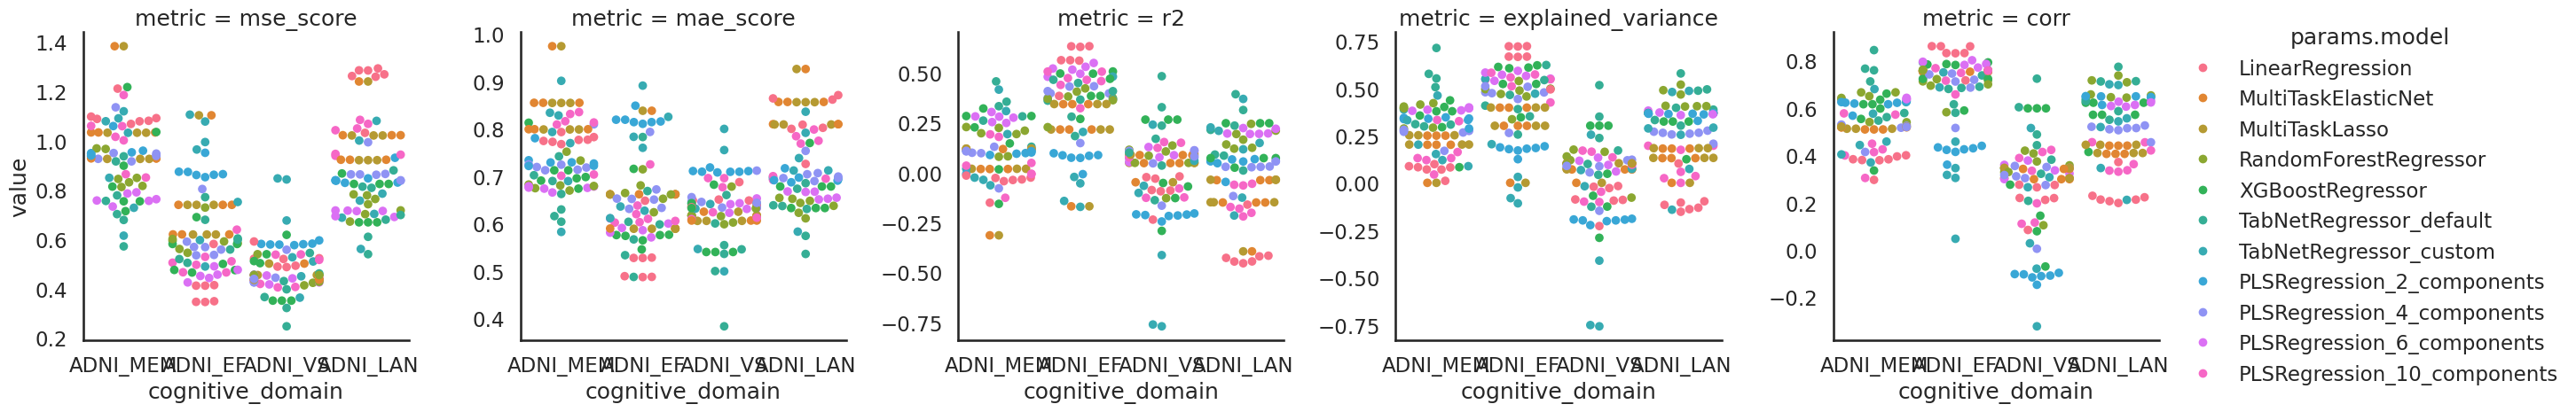

In [ ]:
sns.catplot(data=df_plot_split_ajd, x="cognitive_domain", y="value", col = "metric", hue="params.model", kind="swarm", sharey=False, size=7,  aspect=1)

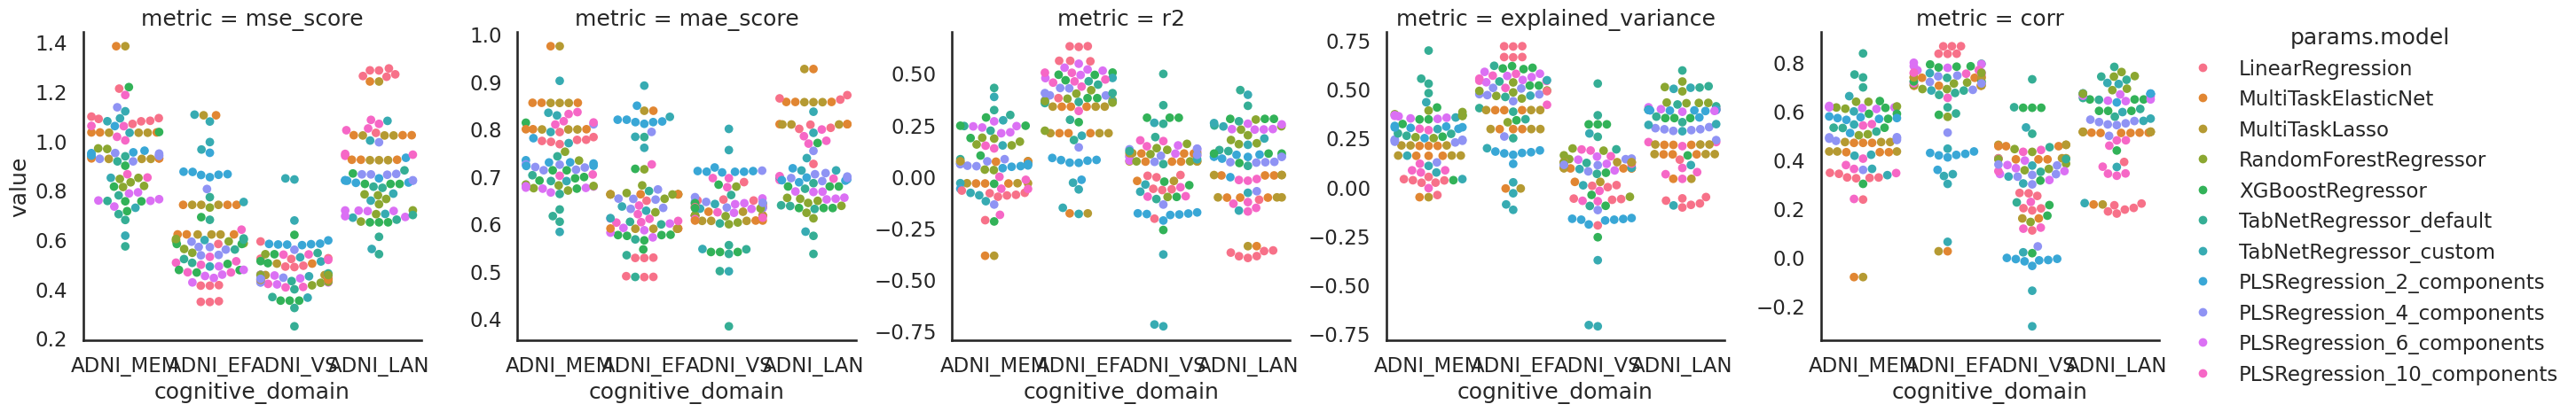

In [ ]:
sns.catplot(data=df_plot_split_org, x="cognitive_domain", y="value", col = "metric", hue="params.model", kind="swarm", sharey=False, size=7,  aspect=1)

# Train models only on MRI features to compare performances

## Option 1 : Test train split

In [ ]:
def train_imputer_model(
    df_X_train, df_X_test, df_y_train, df_y_test,
    c_train, c_test,
    ordinal_model, name_ordinal_imputer, 
    continuous_model, name_continuous_imputer, 
    model, name_model, 
    imputer_model=None, name_imputer=None, 
    separate_imputers=True,
    ordinal_features = ['APOE_epsilon2', 'APOE_epsilon3', 'APOE_epsilon4']
): 
    # Define which columns are ordinal and which are continuous
    continuous_features = [col for col in df_X_train.columns if col not in ordinal_features]

    # Check if a general imputer model (like MissForest or MICEForest) is provided
    if imputer_model is not None and name_imputer is not None and not separate_imputers:
        # If `imputer_model` can handle both categorical and continuous data types
        print(f"Using general imputer model: {name_imputer}")

        # Ensure that ordinal columns are marked as categorical
        df_X_train = df_X_train.copy()
        df_X_test = df_X_test.copy()
        
        for col in ordinal_features:
            df_X_train[col] = df_X_train[col].astype("category")
            df_X_test[col] = df_X_test[col].astype("category")

        # Create a pipeline with the general imputer
        pipeline = Pipeline(steps=[
            (name_imputer, imputer_model)
        ])

        # Fit and transform the entire dataset with the general imputer
        pipeline.fit(df_X_train)
        X_train_imputed = pipeline.transform(df_X_train)
        X_test_imputed = pipeline.transform(df_X_test)

        # Convert transformed output back to DataFrame with original column names
        df_X_train_imputed = pd.DataFrame(X_train_imputed, columns=df_X_train.columns)
        df_X_test_imputed = pd.DataFrame(X_test_imputed, columns=df_X_test.columns)

    else:
        # Separate imputers for ordinal and continuous data
        print("Using separate imputers for ordinal and continuous data.")

        df_X_train = df_X_train.copy()
        df_X_test = df_X_test.copy()

        # Continuous Imputation Transformer (Example: SimpleImputer)
        continuous_imputer = Pipeline([
            (name_continuous_imputer, continuous_model),
        ])

        # Ordinal Imputation Transformer (Example: KNN Imputer)
        ordinal_imputer = Pipeline([
            (name_ordinal_imputer, ordinal_model)
        ])

        # Create a ColumnTransformer to apply the appropriate imputer to each type of variable
        preprocessor = ColumnTransformer(
            transformers=[
                ('ordinal', ordinal_imputer, ordinal_features),
                ('continuous', continuous_imputer, continuous_features)
            ],
            remainder='passthrough'
        )

        # Create the pipeline
        pipeline = Pipeline(steps=[
            ('preprocessor', preprocessor)
        ])

         # Separate imputers for ordinal and continuous data

        # Fit and transform, then convert back to DataFrame with original column names

        if df_X_train.isna().any().any():
                
            start = time.time()
            pipeline.fit(df_X_train)
            end = time.time()

            impute_model_time = end - start

            X_train_imputed = pipeline.transform(df_X_train)
            df_X_train_imputed = df_X_train.copy()
            df_X_train_imputed[ordinal_features+continuous_features] = X_train_imputed

        else :
            print("No NaN in train data -> Keep as it is. ")
            df_X_train_imputed = df_X_train
            
            impute_model_time = None

        # Transform the test set
        if df_X_test.isna().any().any(): 
            X_test_imputed = pipeline.transform(df_X_test)
            df_X_test_imputed = df_X_test.copy()
            df_X_test_imputed[ordinal_features+continuous_features] = X_test_imputed
        else : 
            print("No NaN in test data -> Keep as it is. ")
            df_X_test_imputed = df_X_test

    #df_X_train_imputed[ordinal_features] = df_X_train_imputed[ordinal_features].astype("category")
    #df_X_test_imputed[ordinal_features] = df_X_test_imputed[ordinal_features].astype("category")

    # Demographics adjustment for y
    demographic_adjustment_y = DemographicAdjustmentTransformer()
    
    y_train_adjusted = demographic_adjustment_y.fit_transform(df_y_train, c_train)
    y_test_adjusted = demographic_adjustment_y.transform(df_y_test, c_test)

    # Demographics adjustment for X
    demographic_adjustment_X = DemographicAdjustmentTransformer(categorical_columns=ordinal_features)
    X_train_adjusted = demographic_adjustment_X.fit_transform(df_X_train_imputed, c_train)
    X_test_adjusted = demographic_adjustment_X.transform(df_X_test_imputed, c_test)

    # Perform prediction and save variables
    start = time.time()

    if isinstance(model, TabNetRegressor): 
        X_train_adjusted = X_train_adjusted.values
        y_train_adjusted = y_train_adjusted.values

        X_test_adjusted = X_test_adjusted.values
        #y_test_adjusted = y_test_adjusted.values
    
    model.fit(X_train_adjusted, y_train_adjusted) 
    end = time.time()

    predict_model_time = end - start

    y_pred_adjusted = model.predict(X_test_adjusted)

    y_pred_adjusted = pd.DataFrame(y_pred_adjusted, columns=y_test_adjusted.columns)

    # Metrics computed in original space
    y_pred = demographic_adjustment_y.inverse_transform(y_pred_adjusted, c_test)

    params = {
        "ordinal_imputer": name_ordinal_imputer, 
        "continuous_imputer": name_continuous_imputer, 
        "model": name_model, "train_shape" : X_train_adjusted.shape, 
        "test_shape": X_test_adjusted.shape
    }
    
    if df_X_test.shape[0] != 1: 

        # Metrics computed in adjusted space
        mse_score_adj, mae_score_ajd, r2_adj, explained_variance_adj, corr_adj = compute_all_metrics(y_test_adjusted.values, y_pred_adjusted)

        results_adj = {
            "mse_score": mse_score_adj, 
            "mae_score":mae_score_ajd, 
            "r2":r2_adj, 
            "explained_variance":explained_variance_adj, 
            "corr":corr_adj, 
        }

        mse_score, mae_score, r2, explained_variance, corr = compute_all_metrics(df_y_test.values, y_pred)

        results_org = {
            "mse_score": mse_score, 
            "mae_score": mae_score, 
            "r2": r2, 
            "explained_variance": explained_variance, 
            "corr": corr, 
        }

    else : 
        print("Saving predictions in dict!")
        results_adj = {
            "y_pred": y_pred_adjusted.values, 
            "y_test": y_test_adjusted.values,
        }

        results_org = {
            "y_pred": y_pred.values, 
            "y_test": df_y_test.values,
        }


    dict_results = {
        "params": params, 
        "imputation_time": impute_model_time,
        "fitting_time": predict_model_time, 
        "results_adj": results_adj, 
        "results_org": results_org
        }

    return dict_results


In [ ]:
idx_train = list(df_X.isna().any(axis=1))
idx_test = list(~df_X.isna().any(axis=1))

set_intersect_rid = set(df_all[idx_train].RID).intersection(set(df_all[idx_test].RID))
intersect_rid_idx = df_all.RID.isin(set_intersect_rid)

for i, bool_test in enumerate(idx_test): 
    if intersect_rid_idx.iloc[i] & bool_test:
        idx_test[i] = False
        idx_train[i] = True

In [ ]:
df_X[["APOE_epsilon2", "APOE_epsilon3", "APOE_epsilon4"]] = df_X[["APOE_epsilon2", "APOE_epsilon3", "APOE_epsilon4"]].astype("category")

In [ ]:
df_X_train = df_X[select["MRIth"]].loc[idx_train]
df_X_test = df_X[select["MRIth"]].loc[idx_test]

df_y_train = df_y.loc[idx_train]
df_y_test = df_y.loc[idx_test]

c_train = df_all[["AGE", "PTGENDER", "PTEDUCAT"]].iloc[idx_train]
c_test = df_all[["AGE", "PTGENDER", "PTEDUCAT"]].iloc[idx_test]

In [ ]:
random_state=42
n_imputation_iter = 10

# Define hyperparameters
gain_parameters = {
    'hint_rate': 0.9,
    'alpha': 100,
    'iterations': 1000
}

# Continuous Imputer List (list of tuples with unique strings and corresponding instances)
continuous_imputer_list = [
    ("NoImputer", KNNImputer(n_neighbors=1)),

]

# Ordinal Imputer List (list of tuples with unique strings and corresponding instances)
ordinal_imputer_list = [
    ("NoImputer", SimpleImputer(strategy="most_frequent")),
]

# Predictive Models List (list of tuples with unique strings and corresponding instances)
predictive_models_list = [
    ("LinearRegression", LinearRegression()),
    ("MultiTaskElasticNet", MultiTaskElasticNet()),
    ("MultiTaskLasso", MultiTaskLasso()),
    ("RandomForestRegressor", RandomForestRegressor()),
    ("XGBoostRegressor", XGBoostRegressor()),
    ("TabNetRegressor_default", TabNetModelWrapper()),
    ("TabNetRegressor_custom", TabNetModelWrapper(n_a=32, n_d=32)),
    ("PLSRegression_2_components", PLSRegression(n_components=2)),
    ("PLSRegression_4_components", PLSRegression(n_components=4)),
    ("PLSRegression_10_components", PLSRegression(n_components=10))
]

# Generate all combinations
combinations = list(product(continuous_imputer_list, ordinal_imputer_list, predictive_models_list))

# Display all combinations
for continuous_imputer, ordinal_imputer, model in combinations:
    print(f"Continuous Imputer: {continuous_imputer[0]}, Ordinal Imputer: {ordinal_imputer[0]}, Model: {model[0]}")

print(f"Combinations of preprocessing and models to test : {len(combinations)}")

Continuous Imputer: NoImputer, Ordinal Imputer: NoImputer, Model: LinearRegression
Continuous Imputer: NoImputer, Ordinal Imputer: NoImputer, Model: MultiTaskElasticNet
Continuous Imputer: NoImputer, Ordinal Imputer: NoImputer, Model: MultiTaskLasso
Continuous Imputer: NoImputer, Ordinal Imputer: NoImputer, Model: RandomForestRegressor
Continuous Imputer: NoImputer, Ordinal Imputer: NoImputer, Model: XGBoostRegressor
Continuous Imputer: NoImputer, Ordinal Imputer: NoImputer, Model: TabNetRegressor_default
Continuous Imputer: NoImputer, Ordinal Imputer: NoImputer, Model: TabNetRegressor_custom
Continuous Imputer: NoImputer, Ordinal Imputer: NoImputer, Model: PLSRegression_2_components
Continuous Imputer: NoImputer, Ordinal Imputer: NoImputer, Model: PLSRegression_4_components
Continuous Imputer: NoImputer, Ordinal Imputer: NoImputer, Model: PLSRegression_10_components
Combinations of preprocessing and models to test : 10


In [ ]:
# Initialize HDF5 file
results_file = './6.1.2_missingnesss_aware_selection_pickle/training_2_dict_results.pickle'

with open('./6.1.2_missingnesss_aware_selection_pickle/training_2_dict_results.pickle', "rb") as input_file:
    all_dict_results = pickle.load(input_file)

In [ ]:
for continuous_imputer, ordinal_imputer, model in combinations:
    name_continuous_imputer, continuous_imputer_instance = continuous_imputer
    name_ordinal_imputer, ordinal_imputer_instance = ordinal_imputer
    name_model, model_instance = model

    try: 
    
        # Now you can call your `train_model` function with these components
        dict_results = train_imputer_model(
            df_X_train, df_X_test, df_y_train, df_y_test,
            c_train, c_test,
            ordinal_imputer_instance, name_ordinal_imputer,
            continuous_imputer_instance, name_continuous_imputer,
            model_instance, name_model,
            separate_imputers=True  # Or however you want to specify
        )

    except Exception as e:  

        print(e)
    
        params = {
        "ordinal_imputer": name_ordinal_imputer, 
        "continuous_imputer": name_continuous_imputer, 
        "model": name_model, "train_shape" : df_X_train.shape, 
        "test_shape": df_X_test.shape
    }
        dict_results = {
        "params": params, 
        "imputation_time": None,
        "fitting_time": None, 
        "results_adj": None, 
        "results_org": None
    }
        
    # Optionally keep the all_dict_results list updated
    all_dict_results.append(dict_results)

    # Save the updated results back to the pickle file
    with open(results_file, 'wb') as f:
        pickle.dump(all_dict_results, f)


Using separate imputers for ordinal and continuous data.
No NaN in train data -> Keep as it is. 
No NaN in test data -> Keep as it is. 
Using separate imputers for ordinal and continuous data.
No NaN in train data -> Keep as it is. 
No NaN in test data -> Keep as it is. 
Using separate imputers for ordinal and continuous data.
No NaN in train data -> Keep as it is. 
No NaN in test data -> Keep as it is. 
Using separate imputers for ordinal and continuous data.
No NaN in train data -> Keep as it is. 
No NaN in test data -> Keep as it is. 
Using separate imputers for ordinal and continuous data.
No NaN in train data -> Keep as it is. 
No NaN in test data -> Keep as it is. 
Using separate imputers for ordinal and continuous data.
No NaN in train data -> Keep as it is. 
No NaN in test data -> Keep as it is. 
epoch 0  | loss: 3.05202 |  0:00:00s
epoch 1  | loss: 1.65424 |  0:00:00s
epoch 2  | loss: 1.28961 |  0:00:00s
epoch 3  | loss: 1.14827 |  0:00:00s
epoch 4  | loss: 1.03589 |  0:00:00s

In [ ]:
# Store data (serialize)
with open(results_file, 'wb') as handle:
    pickle.dump(all_dict_results, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
with open(results_file, "rb") as input_file:
    all_dict_results = pickle.load(input_file)

In [ ]:
def missing_results_dict_to_dataframe(dict_output):

    df_results = pd.json_normalize(dict_output)

    for col in df_results.columns[df_results.columns.str.startswith("results")]:
        # Create new columns for each subcategory
        for i, subcategory in enumerate(df_y.columns):
            new_col_name = f"{col}.{subcategory}"
            df_results[new_col_name] = df_results[col].apply(lambda x: x[i] if x is not None else None)

            print(new_col_name)

        # Optionally, drop the original list column
        df_results.drop(columns=col, inplace=True)

    # Show the expanded DataFrame
    return df_results

In [ ]:
df_results_split = missing_results_dict_to_dataframe(all_dict_results)
df_results_split_radar = df_results_split.melt(id_vars=df_results_split.columns[df_results_split.columns.str.startswith("params")].tolist(), value_vars=df_results_split.columns[df_results_split.columns.str.startswith("results")].tolist())

results_adj.mse_score.ADNI_MEM
results_adj.mse_score.ADNI_EF
results_adj.mse_score.ADNI_VS
results_adj.mse_score.ADNI_LAN
results_adj.mae_score.ADNI_MEM
results_adj.mae_score.ADNI_EF
results_adj.mae_score.ADNI_VS
results_adj.mae_score.ADNI_LAN
results_adj.r2.ADNI_MEM
results_adj.r2.ADNI_EF
results_adj.r2.ADNI_VS
results_adj.r2.ADNI_LAN
results_adj.explained_variance.ADNI_MEM
results_adj.explained_variance.ADNI_EF
results_adj.explained_variance.ADNI_VS
results_adj.explained_variance.ADNI_LAN
results_adj.corr.ADNI_MEM
results_adj.corr.ADNI_EF
results_adj.corr.ADNI_VS
results_adj.corr.ADNI_LAN
results_org.mse_score.ADNI_MEM
results_org.mse_score.ADNI_EF
results_org.mse_score.ADNI_VS
results_org.mse_score.ADNI_LAN
results_org.mae_score.ADNI_MEM
results_org.mae_score.ADNI_EF
results_org.mae_score.ADNI_VS
results_org.mae_score.ADNI_LAN
results_org.r2.ADNI_MEM
results_org.r2.ADNI_EF
results_org.r2.ADNI_VS
results_org.r2.ADNI_LAN
results_org.explained_variance.ADNI_MEM
results_org.explained_va

In [ ]:
df_results_split_radar["variable"] = df_results_split_radar["variable"].apply(lambda x : x.replace("_ajd_", "_"))
df_results_split_radar["result_domain"] = df_results_split_radar["variable"].apply(lambda x: x.split(".")[0])
df_results_split_radar["metric"] = df_results_split_radar["variable"].apply(lambda x: "_".join(x.split(".")[1].split(".")[:2]))
df_results_split_radar["cognitive_domain"] = df_results_split_radar["variable"].apply(lambda x: "".join(x.split(".")[2]))
df_results_split_radar = df_results_split_radar.drop(columns=["variable"])
df_results_split_radar["preprocessing"] =  df_results_split_radar[['params.ordinal_imputer', 'params.continuous_imputer']].agg('.'.join, axis=1)
df_results_split_radar["pipeline"] =  df_results_split_radar[['params.ordinal_imputer', 'params.continuous_imputer', 'params.model']].agg('.'.join, axis=1)

In [ ]:
df_results_split_radar

,params.ordinal_imputer,params.continuous_imputer,params.model,params.train_shape,params.test_shape,value,result_domain,metric,cognitive_domain,preprocessing,pipeline
0,SimpleImputer_most_frequent,KNNImputer,LinearRegression,"(2882, 261)","(12, 261)",1.078,results_adj,mse_score,ADNI_MEM,SimpleImputer_most_frequent.KNNImputer,SimpleImputer_most_frequent.KNNImputer.LinearR...
1,SimpleImputer_most_frequent,KNNImputer,MultiTaskElasticNet,"(2882, 261)","(12, 261)",1.032,results_adj,mse_score,ADNI_MEM,SimpleImputer_most_frequent.KNNImputer,SimpleImputer_most_frequent.KNNImputer.MultiTa...
2,SimpleImputer_most_frequent,KNNImputer,MultiTaskLasso,"(2882, 261)","(12, 261)",1.031,results_adj,mse_score,ADNI_MEM,SimpleImputer_most_frequent.KNNImputer,SimpleImputer_most_frequent.KNNImputer.MultiTa...
3,SimpleImputer_most_frequent,KNNImputer,RandomForestRegressor,"(2882, 261)","(12, 261)",0.816,results_adj,mse_score,ADNI_MEM,SimpleImputer_most_frequent.KNNImputer,SimpleImputer_most_frequent.KNNImputer.RandomF...
4,SimpleImputer_most_frequent,KNNImputer,XGBoostRegressor,"(2882, 261)","(12, 261)",0.898,results_adj,mse_score,ADNI_MEM,SimpleImputer_most_frequent.KNNImputer,SimpleImputer_most_frequent.KNNImputer.XGBoost...
...,...,...,...,...,...,...,...,...,...,...,...
1715,NoImputer,NoImputer,TabNetRegressor_default,"(2882, 200)","(12, 200)",0.645,results_org,corr,ADNI_LAN,NoImputer.NoImputer,NoImputer.NoImputer.TabNetRegressor_default
1716,NoImputer,NoImputer,TabNetRegressor_custom,"(2882, 200)","(12, 200)",0.567,results_org,corr,ADNI_LAN,NoImputer.NoImputer,NoImputer.NoImputer.TabNetRegressor_custom
1717,NoImputer,NoImputer,PLSRegression_2_components,"(2882, 200)","(12, 200)",0.634,results_org,corr,ADNI_LAN,NoImputer.NoImputer,NoImputer.NoImputer.PLSRegression_2_components
1718,NoImputer,NoImputer,PLSRegression_4_components,"(2882, 200)","(12, 200)",0.496,results_org,corr,ADNI_LAN,NoImputer.NoImputer,NoImputer.NoImputer.PLSRegression_4_components


In [ ]:
def df_results_radar_to_latex_pretable(df_results_preprocess_radar_, result_domain = "results_adj", scoring_metric="corr", ascending=True): 
        
        df_results_preprocess_to_latex = df_results_preprocess_radar_.drop(columns=["preprocessing", "params.train_shape", "params.test_shape"])

        df = df_results_preprocess_to_latex[df_results_preprocess_to_latex["result_domain"]== result_domain].drop(columns="result_domain")

        df_pivoted = df.pivot_table(index=['params.ordinal_imputer', 'params.continuous_imputer', 'params.model'],
                                    columns=['metric', 'cognitive_domain'],
                                    values='value',
                                    aggfunc='first')

        # Resetting index to flatten the MultiIndex
        df_pivoted.reset_index(inplace=True)
        # Flatten the MultiIndex columns temporarily for filtering
        df_pivoted.columns = ['_'.join(col) if isinstance(col, tuple) else col for col in df_pivoted.columns]

        # Select columns that start with 'params' or contain 'corr'
        columns_to_keep = [col for col in df_pivoted.columns if col.startswith('params') or scoring_metric in col]

        # Filter the dataframe
        df_filtered = df_pivoted[columns_to_keep]

        # Display the filtered dataframe
        # Add a column for the mean of each row
        # Select only the numeric columns (excluding 'params' columns)
        numeric_columns = df_filtered.select_dtypes(include='number').columns

        # Add a column for the mean of each row (across numeric columns)
        df_filtered['mean'] = df_filtered[numeric_columns].mean(axis=1)

        # Add a column for the standard deviation of each row (across numeric columns)
        df_filtered['std'] = df_filtered[numeric_columns].std(axis=1)

        return df_filtered.sort_values("mean", ascending=ascending)

In [ ]:
pd.set_option('display.float_format', '{:.3f}'.format)
df_results_radar_to_latex_pretable(df_results_split_radar, result_domain="results_adj", scoring_metric="corr", ascending=False).dropna()

,params.ordinal_imputer_,params.continuous_imputer_,params.model_,corr_ADNI_EF,corr_ADNI_LAN,corr_ADNI_MEM,corr_ADNI_VS,mean,std
9,KNNImputer,KNNImputer,TabNetRegressor_default,0.737,0.637,0.766,0.723,0.716,0.056
31,SimpleImputer_constant,KNNImputer,XGBoostRegressor,0.792,0.622,0.634,0.598,0.662,0.088
29,SimpleImputer_constant,KNNImputer,TabNetRegressor_custom,0.750,0.700,0.679,0.515,0.661,0.102
42,SimpleImputer_most_frequent,KNNImputer,XGBoostRegressor,0.783,0.622,0.597,0.598,0.650,0.090
10,KNNImputer,KNNImputer,XGBoostRegressor,0.785,0.622,0.553,0.598,0.640,0.101
39,SimpleImputer_most_frequent,KNNImputer,RandomForestRegressor,0.721,0.716,0.642,0.419,0.625,0.142
28,SimpleImputer_constant,KNNImputer,RandomForestRegressor,0.717,0.737,0.638,0.407,0.625,0.151
27,SimpleImputer_constant,KNNImputer,PLSRegression_6_components,0.782,0.623,0.634,0.346,0.596,0.182
38,SimpleImputer_most_frequent,KNNImputer,PLSRegression_6_components,0.770,0.631,0.636,0.322,0.590,0.190
6,KNNImputer,KNNImputer,PLSRegression_6_components,0.761,0.626,0.630,0.299,0.579,0.197


In [ ]:
pd.set_option('display.float_format', '{:.3f}'.format)
df_results_radar_to_latex_pretable(df_results_split_radar, result_domain="results_adj", scoring_metric="mae_score", ascending=True)

,params.ordinal_imputer_,params.continuous_imputer_,params.model_,mae_score_ADNI_EF,mae_score_ADNI_LAN,mae_score_ADNI_MEM,mae_score_ADNI_VS,mean,std
9,KNNImputer,KNNImputer,TabNetRegressor_default,0.487,0.685,0.615,0.383,0.543,0.134
29,SimpleImputer_constant,KNNImputer,TabNetRegressor_custom,0.636,0.583,0.689,0.499,0.602,0.081
31,SimpleImputer_constant,KNNImputer,XGBoostRegressor,0.564,0.632,0.673,0.540,0.602,0.061
42,SimpleImputer_most_frequent,KNNImputer,XGBoostRegressor,0.576,0.632,0.695,0.540,0.611,0.068
10,KNNImputer,KNNImputer,XGBoostRegressor,0.574,0.632,0.698,0.540,0.611,0.069
19,NoImputer,NoImputer,TabNetRegressor_default,0.603,0.637,0.702,0.554,0.624,0.062
27,SimpleImputer_constant,KNNImputer,PLSRegression_6_components,0.586,0.654,0.665,0.632,0.634,0.035
39,SimpleImputer_most_frequent,KNNImputer,RandomForestRegressor,0.661,0.622,0.674,0.598,0.639,0.035
28,SimpleImputer_constant,KNNImputer,RandomForestRegressor,0.664,0.611,0.680,0.602,0.639,0.039
38,SimpleImputer_most_frequent,KNNImputer,PLSRegression_6_components,0.600,0.652,0.675,0.642,0.642,0.032


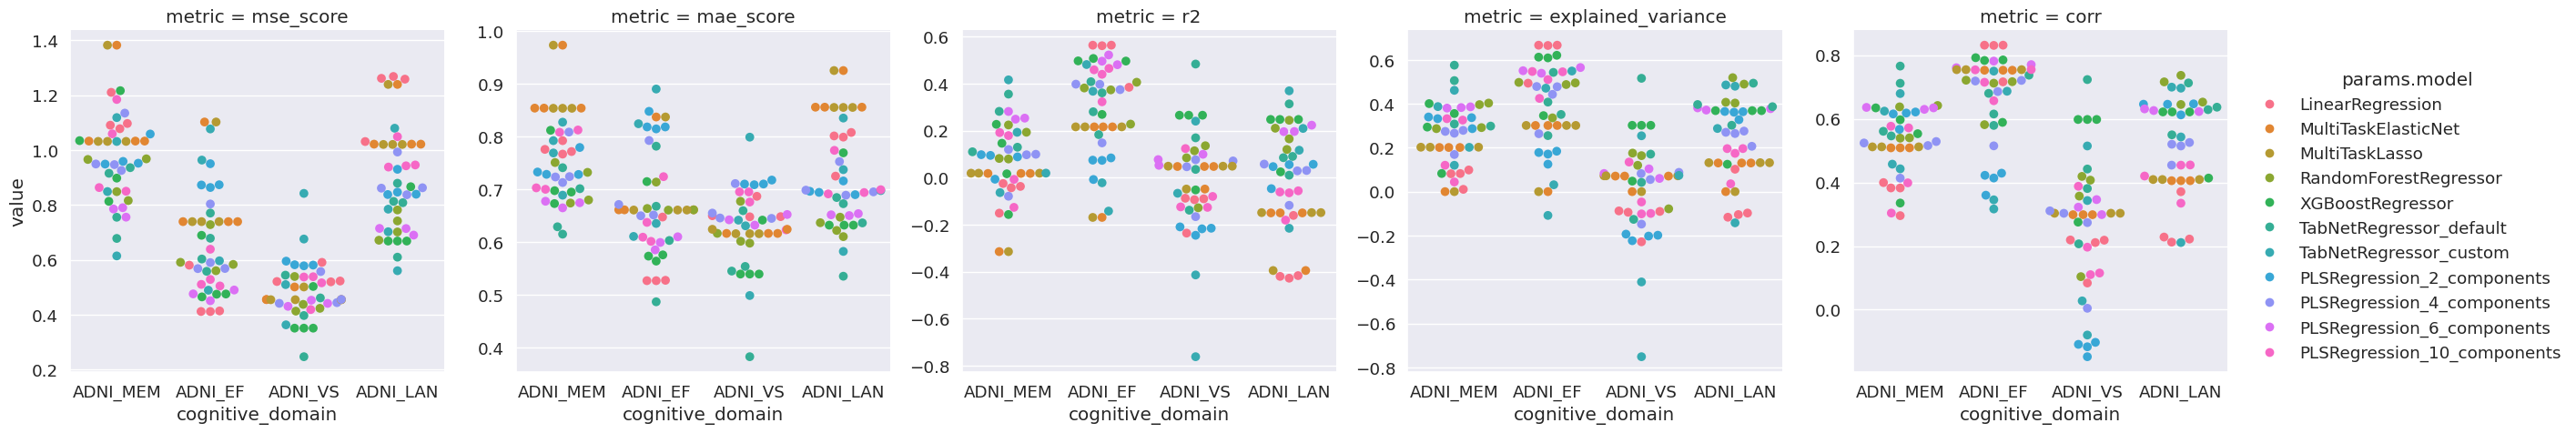

In [ ]:
df_plot_split_ajd = df_results_split_radar[df_results_split_radar['result_domain'] == "results_adj"]
df_plot_split_org = df_results_split_radar[df_results_split_radar['result_domain'] == "results_org"]

sns.catplot(data=df_plot_split_ajd, x="cognitive_domain", y="value", col = "metric", hue="params.model", kind="swarm", sharey=False, size=7,  aspect=1)

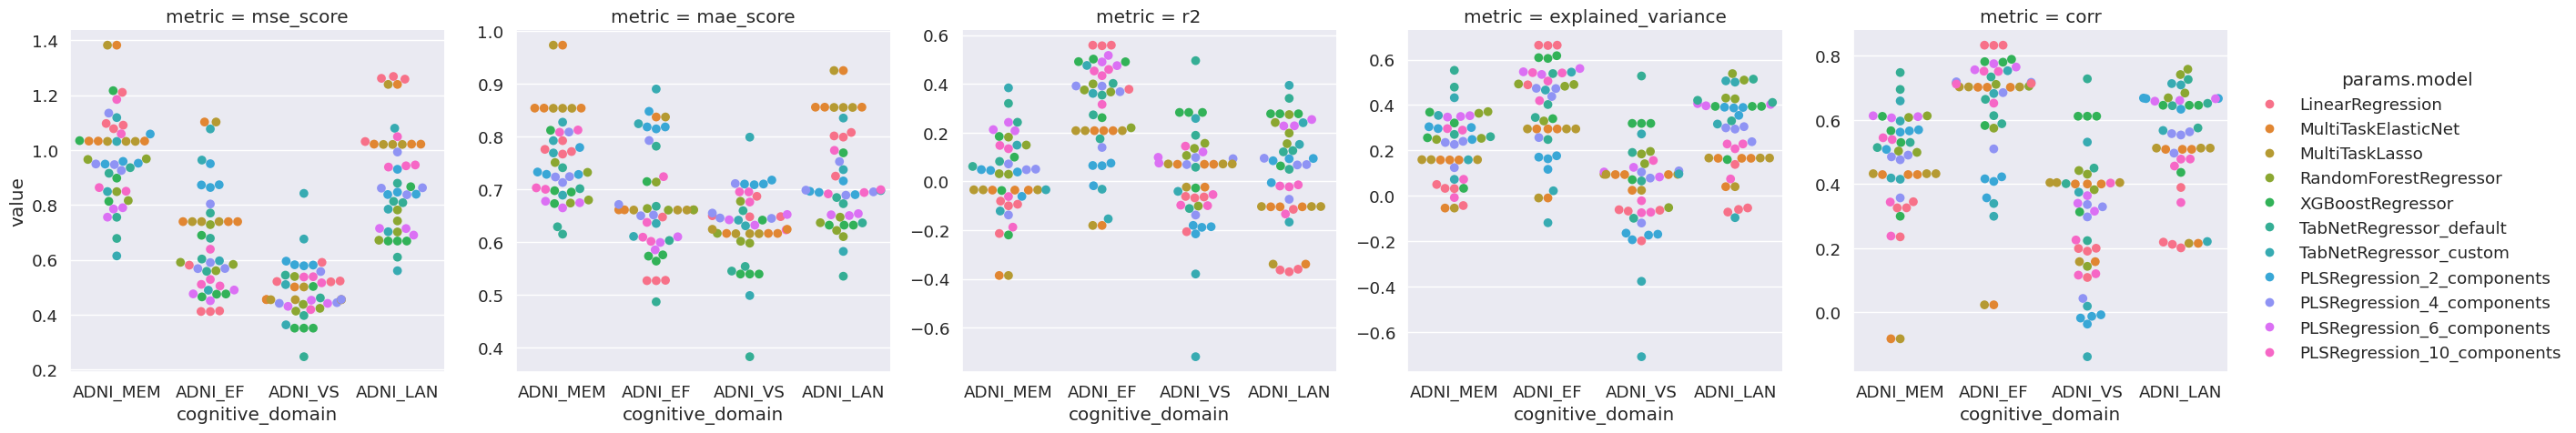

In [ ]:
sns.catplot(data=df_plot_split_org, x="cognitive_domain", y="value", col = "metric", hue="params.model", kind="swarm", sharey=False, size=7,  aspect=1)